## Load model

In [ ]:
!pip install audonnx
!pip install audeer
!pip install audinterface
!pip install audb
!pip install audmetric
!pip install audplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 41.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 79.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 KB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 53.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 KB 8.1 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.6
    Uninstalling protobuf-3.19.6:
      Successfully uninstalled protobuf-3.19.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.2 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
tensorboard 2.9.1 requires protobuf<3.20,>=3.9.2, but you have 

In [ ]:
import audb
import audformat
import numpy as np 
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os

import audeer


model_root = 'model'
cache_root = 'cache'


audeer.mkdir(cache_root)
def cache_path(file):
    return os.path.join(cache_root, file)


url = 'https://zenodo.org/record/6221127/files/w2v2-L-robust-12.6bc4a7fd-1.1.0.zip'
dst_path = cache_path('model.zip')

if not os.path.exists(dst_path):
    audeer.download_url(
        url, 
        dst_path, 
        verbose=True,
    )
    
if not os.path.exists(model_root):
    audeer.extract_archive(
        dst_path, 
        model_root, 
        verbose=True,
    )

In [ ]:
import audonnx
model = audonnx.load(model_root)
model

Input:
  signal:
    shape: [1, -1]
    dtype: tensor(float)
    transform: None
Output:
  hidden_states:
    shape: [1, 1024]
    dtype: tensor(float)
    labels: [hidden_states-0, hidden_states-1, hidden_states-2, (...), hidden_states-1021,
      hidden_states-1022, hidden_states-1023]
  logits:
    shape: [1, 3]
    dtype: tensor(float)
    labels: [arousal, dominance, valence]

In [ ]:
##Loading our data

!mkdir -p /content/data
!cp '/content/drive/MyDrive/dataset/ALL.rar' '/content/'
!unrar  x /content/ALL.rar 


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/ALL.rar

Creating    ALL                                                       OK
Extracting  ALL/fm01_ang (1).wav                                           0%  OK 
Extracting  ALL/fm01_ang (10).wav                                          0%  OK 
Extracting  ALL/fm01_ang (11).wav                                          0%  OK 
Extracting  ALL/fm01_ang (12).wav                                          0%  OK 
Extracting  ALL/fm01_ang (13).wav                                          1%  OK 
Extracting  ALL/fm01_ang (14).wav                                          1%  OK 
Extracting  ALL/fm01_ang (15).wav                                          1%  OK 
Extracting  ALL/fm01_ang (16).wav                                          1%  OK 
Extracting  ALL/fm01_ang (17).wav                                          1%  

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/dataset/emotion_dataset.csv')
df.pop('Unnamed: 0')
df=df.rename(columns ={"path": "file","name":"speaker"})
df.head()

,speaker,file,emotion
0,fm01,/content/ALL/fm01_ang (1).wav,ang
1,fm01,/content/ALL/fm01_ang (10).wav,ang
2,fm01,/content/ALL/fm01_ang (11).wav,ang
3,fm01,/content/ALL/fm01_ang (12).wav,ang
4,fm01,/content/ALL/fm01_ang (13).wav,ang


In [ ]:
formatted=audformat.utils.concat([df['emotion'], df['file']])

In [ ]:
!pip install audformat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import audinterface

In [ ]:
import pandas as pd


hidden_states = audinterface.Feature(
    model.labels('hidden_states'),
    process_func=model,
    process_func_args={
        'outputs': 'hidden_states',
    },
    sampling_rate=16000,    
    resample=True,    
    num_workers=5,
    verbose=True,
)

path = cache_path('w2v2.pkl')
 
if not os.path.exists(path):
    features_w2v2 = hidden_states.process_files(
        np.array(formatted['file'])
        
    )
    features_w2v2.to_pickle(path)    
    
features_w2v2 = pd.read_pickle(path)
features_w2v2

,,,hidden_states-0,hidden_states-1,hidden_states-2,hidden_states-3,hidden_states-4,hidden_states-5,hidden_states-6,hidden_states-7,hidden_states-8,hidden_states-9,...,hidden_states-1014,hidden_states-1015,hidden_states-1016,hidden_states-1017,hidden_states-1018,hidden_states-1019,hidden_states-1020,hidden_states-1021,hidden_states-1022,hidden_states-1023
file,start,end,,,,,,,,,,,,,,,,,,,,,
/content/ALL/fm01_ang (1).wav,0 days,0 days 00:00:02.031746032,-0.007289,0.006494,-0.010013,-0.007659,-0.004462,-0.008356,-0.021587,0.007155,0.066022,-0.001554,...,0.005128,0.011417,-0.034895,0.007993,-0.011448,-0.001829,0.088457,0.007281,0.007152,0.006377
/content/ALL/fm01_ang (10).wav,0 days,0 days 00:00:02.304580499,-0.007374,0.006844,-0.005884,-0.006789,-0.004164,-0.007676,0.015216,0.006432,0.163633,-0.002083,...,0.003709,0.011672,-0.018752,0.008036,-0.009684,-0.070259,0.048417,0.007228,0.008099,0.005876
/content/ALL/fm01_ang (11).wav,0 days,0 days 00:00:03.018594104,-0.007616,0.007014,-0.007335,-0.006423,-0.004602,-0.007775,0.055728,0.006732,0.047609,-0.002069,...,0.003580,0.011447,-0.027270,0.008006,-0.022146,0.024012,0.096077,0.007172,0.007851,0.006359
/content/ALL/fm01_ang (12).wav,0 days,0 days 00:00:02.600634921,-0.007892,0.006523,-0.005964,-0.007214,-0.004988,-0.007573,0.041038,0.007230,0.200014,-0.001511,...,0.003740,0.010922,-0.016603,0.008017,0.039160,0.102319,0.026685,0.007462,0.008048,0.006558
/content/ALL/fm01_ang (13).wav,0 days,0 days 00:00:02.101405896,-0.007677,0.006173,-0.003640,-0.006244,-0.005323,-0.007947,0.101916,0.007231,0.185444,-0.001930,...,0.004603,0.011120,-0.013134,0.007850,0.049923,0.076073,0.224163,0.007650,0.007981,0.007607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
/content/ALL/ml03_sad (5).wav,0 days,0 days 00:00:02.240725624,-0.007636,0.006716,-0.006563,-0.006753,-0.004043,-0.007537,-0.089546,0.006631,-0.070789,-0.002336,...,0.003221,0.011253,-0.055915,0.007761,-0.012286,-0.051055,0.060796,0.007205,0.008256,0.004021
/content/ALL/ml03_sad (6).wav,0 days,0 days 00:00:02.600634921,-0.007370,0.007204,-0.007988,-0.008597,-0.004100,-0.007430,0.108776,0.006451,-0.030914,-0.002484,...,0.003168,0.011523,-0.030782,0.007954,-0.019629,-0.043756,-0.068092,0.007396,0.007382,0.004340
/content/ALL/ml03_sad (7).wav,0 days,0 days 00:00:02.275555556,-0.007346,0.005931,-0.008185,-0.007600,-0.003520,-0.006414,-0.009719,0.007082,-0.111403,-0.002403,...,0.003039,0.011272,-0.045615,0.007971,0.000831,0.251831,-0.090348,0.006889,0.007285,0.002505


As classifier, we use a Support Vector Classification from [scikit-learn](https://scikit-learn.org/). Since Emo-DB does not define an official train and test set, we apply leave-one-speaker-out, i.e. we predict each speaker individually after training on the other speakers. For this purpose, we define the following utility function.

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm


# create classifier and grouping object
clf = make_pipeline(
    StandardScaler(), 
    SVC(C = 100, kernel = 'rbf',gamma='auto'),
)
logo = LeaveOneGroupOut()

def experiment(
    features,
    targets,
    groups,
):        
    truths = []
    preds = []
    
    # leave-one-speaker loop    
    pbar = audeer.progress_bar(
        total=len(groups.unique()),
        desc='Run experiment',
    )
    for train_index, test_index in logo.split(
        features, 
        targets, 
        groups=groups,
    ):
        train_x = features.iloc[train_index]
        train_y = targets[train_index]
        clf.fit(train_x, train_y)
        
        truth_x = features.iloc[test_index]
        truth_y = targets[test_index]
        predict_y = clf.predict(truth_x)
        
        truths.append(truth_y)
        preds.append(predict_y)
        
        pbar.update()
        
    # combine speaker folds
    truth = pd.concat(truths)
    truth.name = 'truth'
    pred = pd.Series(
        np.concatenate(preds),
        index=truth.index,
        name='prediction',
    )
    
    return truth, pred

After passing the features to the utility function, we get ground truth and predictions for every sentence in the database.

In [ ]:
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import svm

from sklearn.ensemble import RandomForestClassifier
# create classifier and grouping object
clf = make_pipeline(
    StandardScaler(), 
     RandomForestClassifier(random_state=0),
)
logo = LeaveOneGroupOut()

def experiment(
    features,
    targets,
    groups,
):        
    truths = []
    preds = []
    
    # leave-one-speaker loop    
    pbar = audeer.progress_bar(
        total=len(groups.unique()),
        desc='Run experiment',
    )
    for train_index, test_index in logo.split(
        features, 
        targets, 
        groups=groups,
    ):
        train_x = features.iloc[train_index]
        train_y = targets[train_index]
        clf.fit(train_x, train_y)
        
        truth_x = features.iloc[test_index]
        truth_y = targets[test_index]
        predict_y = clf.predict(truth_x)
        
        truths.append(truth_y)
        preds.append(predict_y)
        
        pbar.update()
        
    # combine speaker folds
    truth = pd.concat(truths)
    truth.name = 'truth'
    pred = pd.Series(
        np.concatenate(preds),
        index=truth.index,
        name='prediction',
    )
    
    return truth, pred

In [ ]:
truth_w2v2, pred_w2v2 = experiment(
    features_w2v2,
    df['emotion'],
    df['speaker'],
)
audformat.utils.concat([truth_w2v2, pred_w2v2])

,truth,prediction
0,ang,ang
1,ang,ang
2,ang,neu
3,ang,ang
4,ang,ang
...,...,...
574,sad,sad
575,sad,sad
576,sad,sad
577,sad,sad


In [ ]:
import audmetric
audmetric.unweighted_average_recall(truth_w2v2, pred_w2v2)

0.6252643784786642

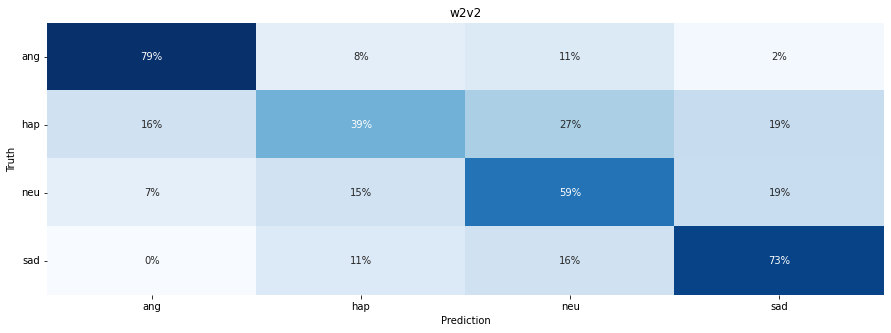

In [ ]:
import audplot
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 1, figsize=[15, 5])
axs.set_title('w2v2')
audplot.confusion_matrix(
    truth_w2v2, 
    pred_w2v2,
    percentage=True,
    ax=axs,
)

In [ ]:
from keras import models, layers

In [ ]:
df_cmbined_labels = pd.merge(features_w2v2, df[['file','emotion']], on=['file'], how='inner')
df_cmbined_labels['emotion']=df_cmbined_labels['emotion'].replace(['sad','ang','hap','neu'], [0, 1, 2,3])
Y=df_cmbined_labels['emotion']
X=df_cmbined_labels.drop(columns=['file','emotion'])

In [ ]:
Y.to_frame()

,emotion
0,1
1,1
2,1
3,1
4,1
...,...
574,0
575,0
576,0
577,0


In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D, MaxPooling2D

from keras.layers import Dense, Dropout, Flatten
train_data, test_data, train_targets, test_targets = train_test_split(X, Y, test_size=.2)

In [ ]:
train_data.shape

(463, 1024)

In [ ]:
model = models.Sequential()

model.add(layers.Dense(1024, input_shape=(train_data.shape[1],), activation='sigmoid'))

model.add(layers.Dense(500, activation='relu'))

model.add(layers.Dense(250, activation='sigmoid'))
for layer in model.layers:
    print(layer.get_output_at(0).get_shape().as_list())
model.add(Flatten())
model.add(layers.Dense(4, activation='softmax'))

[None, 1024]
[None, 500]
[None, 250]


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1024)              1049600   
                                                                 
 dense_1 (Dense)             (None, 500)               512500    
                                                                 
 dense_2 (Dense)             (None, 250)               125250    
                                                                 
 flatten (Flatten)           (None, 250)               0         
                                                                 
 dense_3 (Dense)             (None, 4)                 1004      
                                                                 
Total params: 1,688,354
Trainable params: 1,688,354
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.metrics import classification_report
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(train_data, train_targets, epochs=30, batch_size=16)

Epoch 1/30
29/29 [==============================] - 2s 25ms/step - loss: 1.4414 - acc: 0.2808
Epoch 2/30
29/29 [==============================] - 1s 29ms/step - loss: 1.1893 - acc: 0.4428
Epoch 3/30
29/29 [==============================] - 1s 28ms/step - loss: 0.9798 - acc: 0.5508
Epoch 4/30
29/29 [==============================] - 1s 27ms/step - loss: 0.9630 - acc: 0.5594
Epoch 5/30
29/29 [==============================] - 1s 33ms/step - loss: 0.8958 - acc: 0.5853
Epoch 6/30
29/29 [==============================] - 1s 30ms/step - loss: 0.9088 - acc: 0.6112
Epoch 7/30
29/29 [==============================] - 1s 30ms/step - loss: 0.8441 - acc: 0.6220
Epoch 8/30
29/29 [==============================] - 1s 21ms/step - loss: 0.8148 - acc: 0.6501
Epoch 9/30
29/29 [==============================] - 0s 15ms/step - loss: 0.8029 - acc: 0.6609
Epoch 10/30
29/29 [==============================] - 0s 15ms/step - loss: 0.7789 - acc: 0.6415
Epoch 11/30
29/29 [==============================] - 0s 15m

In [ ]:
test_predictions = model.predict(test_data)

4/4 [==============================] - 0s 8ms/step


In [ ]:
pred=[]
for logits in test_predictions:
  logits=list(logits)
  label=logits.index(max(list(logits)))
  pred.append(label)


In [ ]:
print(classification_report(test_targets, pred))

              precision    recall  f1-score   support

           0       0.76      0.79      0.77        28
           1       0.76      0.94      0.84        33
           2       0.82      0.64      0.72        22
           3       0.66      0.58      0.61        33

    accuracy                           0.74       116
   macro avg       0.75      0.73      0.74       116
weighted avg       0.74      0.74      0.74       116

